<a href="https://www.kaggle.com/code/kazishadmansakib/97-kazishadmansakib-mallcustomersegmentation?scriptVersionId=118592628" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Table of Contents:**
    1. Objective
    2. Imported Libraries
    3. Input File
    4. Data Inspection and Cleaning
    5. Data Visualization and Analysis
    6. Feature Scaling
    7. KMeans Clustering
       • Age and Spending Score Clustering
       • Annual Income and Spending Score Clustering
       • Age, Annual Income and Spending Score Clustering
    

In [1]:
# Objective
# The goal here is to determine which customers are a good target for the marketing department.
# We will be using the Customer Segmentation Method by implementing the KMeans Clustering Algorithm.
# Thus, achieve customer segmentation and target customers whom we can easily converge.

# **Imported Libraries**

In [2]:
# import libraries needed
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)

# **Input File**

1. Fetch the input file path
2. Read input file 
3. Display Train data

In [3]:
# Fetch the path of input file
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# train data fetched
train_data = pd.read_csv("/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")

# Display the head of the train data
train_data.head()

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# **Data Inspection and Cleaning**

# Checking the row and column numbers

In [4]:
train_data.shape

(200, 5)

# Checking the information of train data (Row and Column entries)

In [5]:
# checking the column names
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# Checking if any of the parameters (columns) has null values

In [6]:
# checking if there is any null values in any colums
train_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Data cleaning of redundant column named CustomerID

In [7]:
# deleted redundant column named CustomerID 
del train_data["CustomerID"]

train_data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


# Description of the train data (Count, Mean, Standard Deviation, Minimum, 25% Quartile, 50% Quartile, 75% Quartile, Maximum)

In [8]:
train_data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


# **Data Visualization and Analysis**

# Visualizing if any of the columns has null values

<AxesSubplot:>

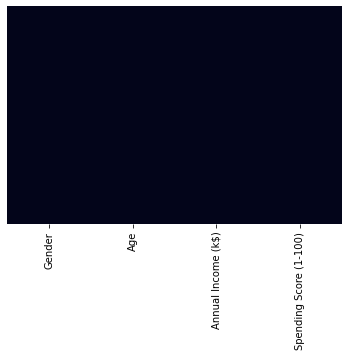

In [9]:
# visualization of null values if there is any
sns.heatmap(train_data.isnull(), yticklabels = False, cbar = False)

# Countplot of Gender (Male vs Female)

<AxesSubplot:xlabel='Gender', ylabel='count'>

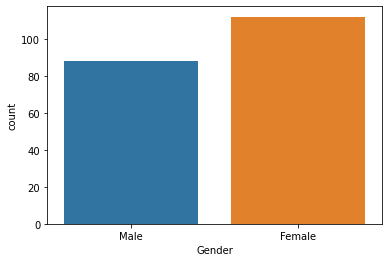

In [10]:
# Gender count graph Male vs Female Customers
sns.countplot(x = "Gender", data = train_data)



# Histogram of Age, Annual Income and Spending Score (1-100) of the customers

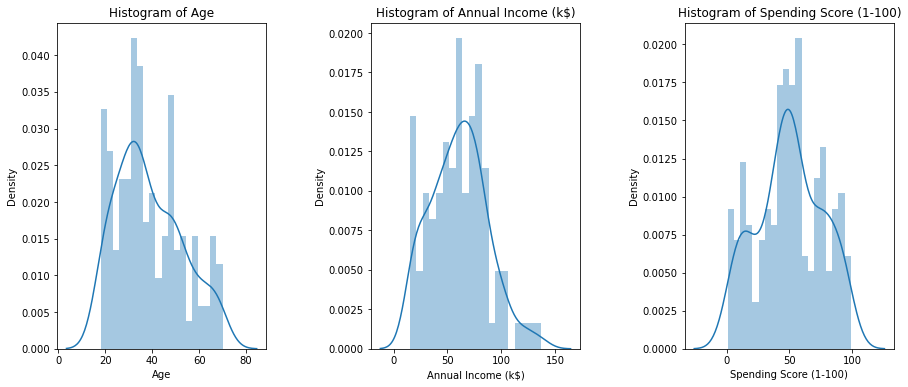

In [11]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(train_data[x] , bins = 20)
    plt.title('Histogram of {}'.format(x))
plt.show()

# Ploting the Relation between Age, Annual Income and Spending Score of the customers

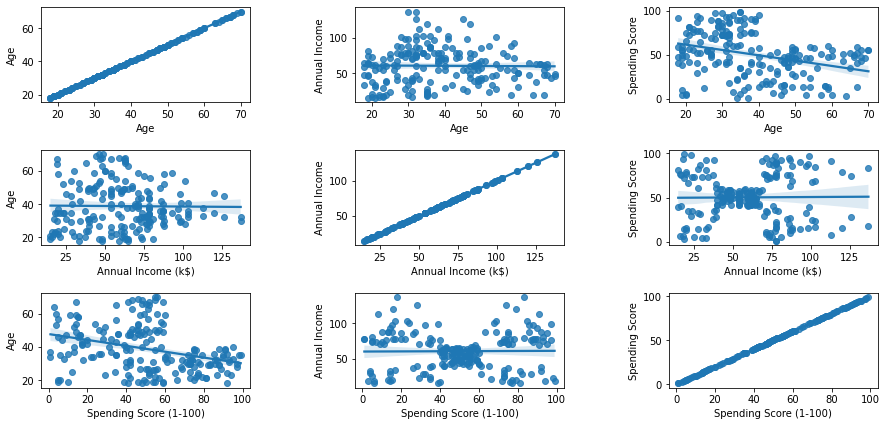

In [12]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = train_data)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

# Ploting the Relation between Age and Annual Income according to Gender

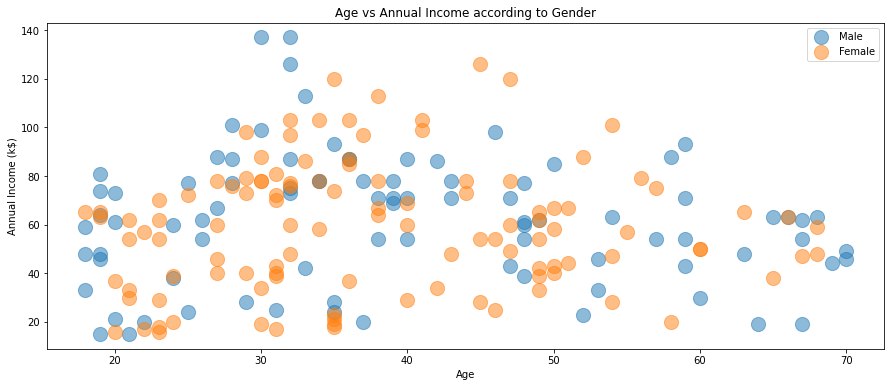

In [13]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = train_data[train_data['Gender'] == gender],
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)') 
plt.title('Age vs Annual Income according to Gender')
plt.legend()
plt.show()

# Ploting the Relation between Age and Spending according to Gender

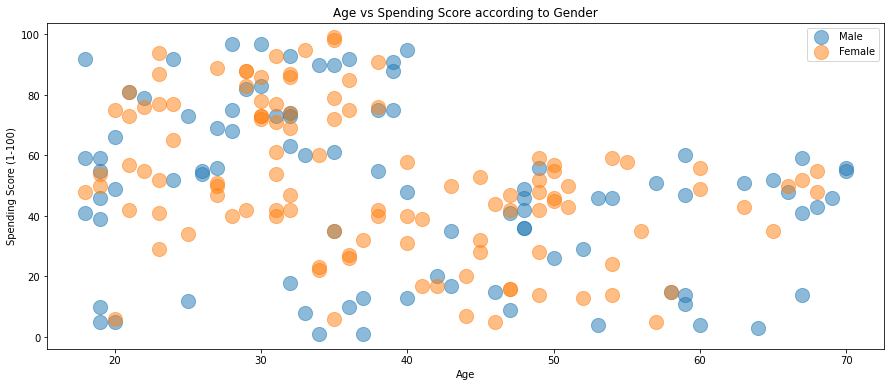

In [14]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Spending Score (1-100)' , data = train_data[train_data['Gender'] == gender],
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Spending Score (1-100)') 
plt.title('Age vs Spending Score according to Gender')
plt.legend()
plt.show()

# Ploting the Relation between Annual Income and Spending according to Gender

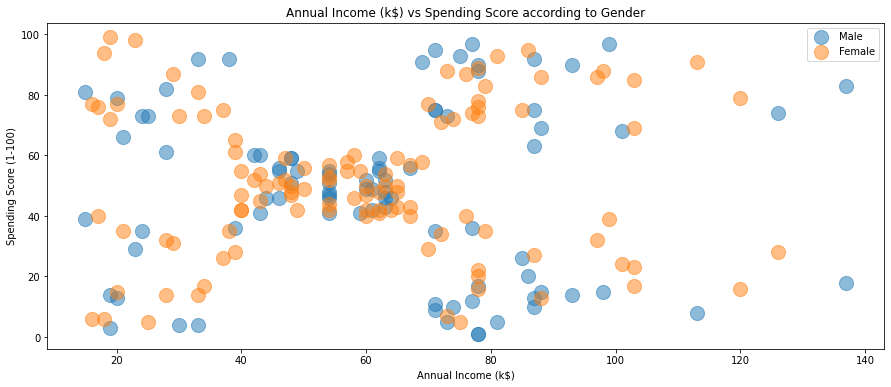

In [15]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)' , y = 'Spending Score (1-100)' , data = train_data[train_data['Gender'] == gender],
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)') 
plt.title('Annual Income (k$) vs Spending Score according to Gender')
plt.legend()
plt.show()

# According to Gender (Male and Female), distribution of values in Age, Annual Income and Spending Score

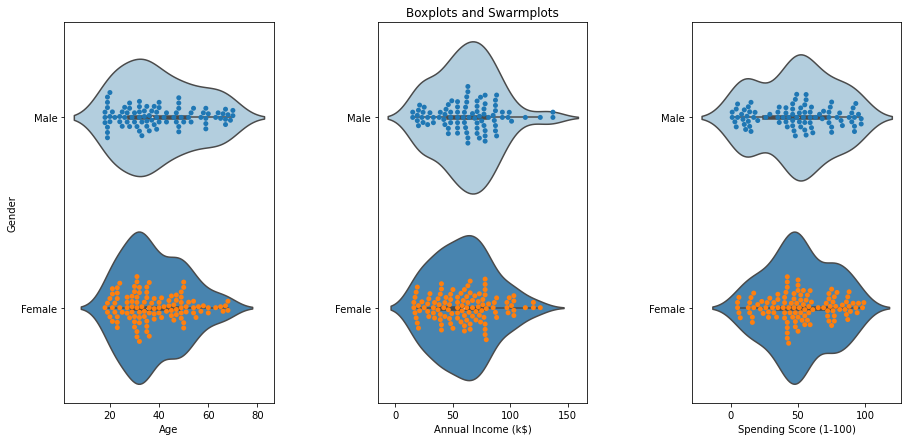

In [16]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = "Gender" , data = train_data , palette = 'Blues')
    sns.swarmplot(x = cols , y = "Gender" , data = train_data)
    plt.ylabel("Gender" if n == 1 else '')
    plt.title('Boxplots and Swarmplots' if n == 2 else '')
plt.show()

# According to Gender (Male and Female), distribution of values in Age, Annual Income and Spending Score with inner stick

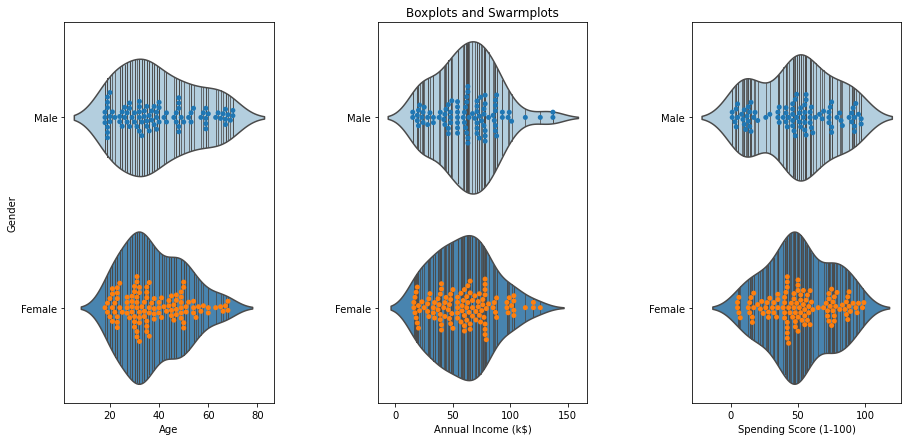

In [17]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = train_data , palette = 'Blues',  inner="stick")
    sns.swarmplot(x = cols , y = 'Gender' , data = train_data)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots and Swarmplots' if n == 2 else '')
plt.show()

# **Feature Scaling**

# Normalizing all variables using MinMaxScaler from sklearn

In [18]:
quantitative_columns = ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']
min_max_scaler = MinMaxScaler()
train_data[quantitative_columns] = min_max_scaler.fit_transform(train_data[quantitative_columns])
train_data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,0.019231,0.000000,0.387755
1,Male,0.057692,0.000000,0.816327
2,Female,0.038462,0.008197,0.051020
3,Female,0.096154,0.008197,0.775510
4,Female,0.250000,0.016393,0.397959


# **KMeans Clustering**

# **• Age and Spending Score Clustering**

# Elbow Method 

In [19]:
# Age and Spending Score
X1 = train_data[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
n_max = 11
for n in range(1 , n_max):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

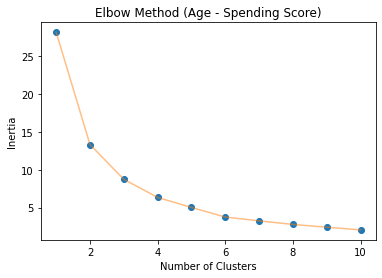

In [20]:
plt.title('Elbow Method (Age - Spending Score)')
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

# Model Fit using KMeans Clustering Algorithm

In [21]:
k = 2
algorithm = (KMeans(n_clusters = k ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [22]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

# Clusters

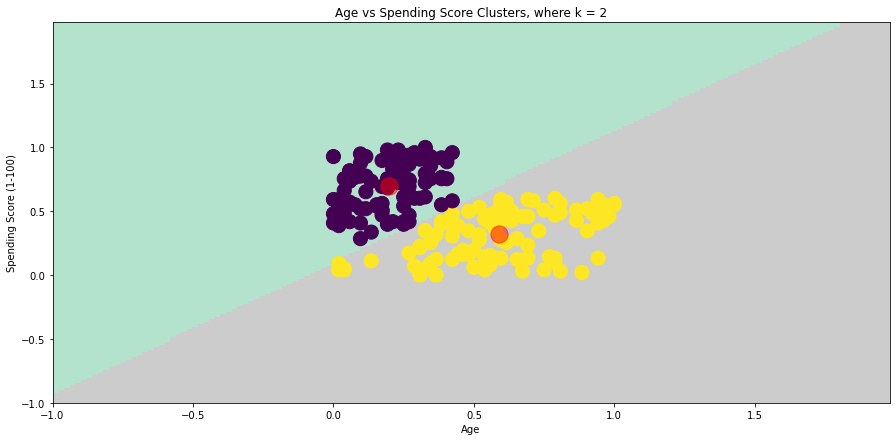

In [23]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.title("Age vs Spending Score Clusters, where k = 2")
plt.scatter( x = 'Age' ,y = 'Spending Score (1-100)' , data = train_data , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

# Inference: Target Customers

   **⋅ Light Green Cluster :** This cluster says that the LOW AGE customers have the HIGHEST SPENDING SCORE. (Preffered Target Customer)

   **⋅ Ash Cluster :** This cluster says that the HIGH AGE Customers have MEDIUM SPENDING SCORE.
   
   **So our Preffered Target Customers should be LOW AGE customers. (Light Green Cluster)**

# **• Annual Income and Spending Score Clustering**

# Elbow Method 

In [24]:
# Annual Income and Spending Score
X2 = train_data[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
n_max = 11
for n in range(1 , n_max):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

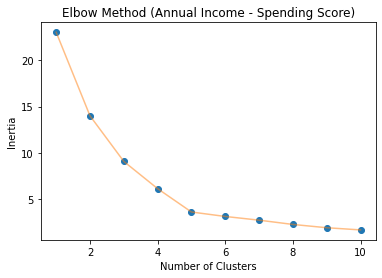

In [25]:
plt.title('Elbow Method (Annual Income - Spending Score)')
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

# Model Fit using KMeans Clustering Algorithm

In [26]:
k = 5
algorithm = (KMeans(n_clusters = k,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

In [27]:
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

# Clusters

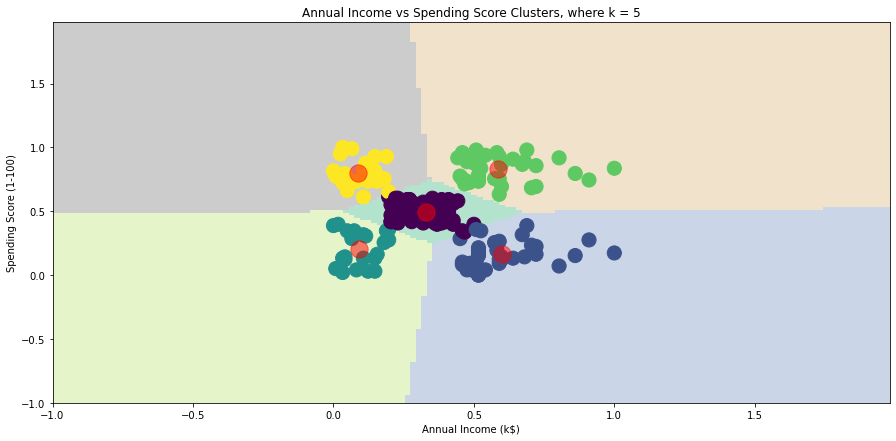

In [28]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')
plt.title("Annual Income vs Spending Score Clusters, where k = 5")
plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = train_data , c = labels2 , 
            s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Annual Income (k$)')
plt.show()

# Inference: Target Customers
    
   **⋅ Light Green Cluster :** MEDIUM ANNUAL INCOME customers have MEDIUM SPENDING SCORE which is very consistent. (Preffered Target Customers)

   **⋅ Ash Cluster :** LOW ANNUAL INCOME and HIGHT SPENDING SCORE but the cluster seems scattered thus inconsistent. 
   
   **⋅ Light Brown Cluster :** HIGH ANNUAL INCOME and HIGHT SPENDING SCORE but the cluster seems scattered thus inconsistent.
   
   **⋅ Asparagus Green Cluster :** LOW ANNUAL INCOME and LOW SPENDING SCORE.
   
   **⋅ Light Blue Cluster :** HIGHT ANNUAL INCOME and LOW SPENDING SCORE.
   
   **So our Preffered Target Customers should be MEDIUM ANNUAL INCOME customers. (Light Green Cluster)**

# **• Age, Annual Income and Spending Score Clustering**

# Elbow Method 

In [29]:
X3 = train_data[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

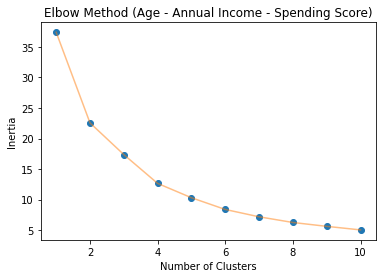

In [30]:
plt.title('Elbow Method (Age - Annual Income - Spending Score)')
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

# Model Fit using KMeans Clustering Algorithm

In [31]:
k = 4
algorithm = (KMeans(n_clusters = k,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

# Clusters

In [32]:
train_data['label3'] =  labels3
trace1 = go.Scatter3d(
    x= train_data['Age'],
    y= train_data['Spending Score (1-100)'],
    z= train_data['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        colorscale = "rainbow",
        color = train_data['label3'], 
        size= 20,
        line=dict(
            colorscale = "rainbow",
            color= train_data['label3'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    title= 'Age vs Spending Score vs Annual Income Clusters, where k = 4',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

# Inference: Target Customers

**⋅ Red Cluster :** MEDIUM-HIGH AGE with LOW-MEDIUM ANNUAL INCOME customers have LOW-MEDIUM SPENDING SCORE.

**⋅ Magenta Cluster :** LOW-MEDIUM AGE with LOW-MEDIUM ANNUAL INCOME customers have MEDIUM-HIGH SPENDING SCORE.

**⋅ Blue Cluster :** LOW-MEDIUM AGE with MEDIUM-HIGH ANNUAL INCOME customers have MEDIUM-HIGH SPENDING SCORE.

**⋅ Green Cluster :** LOW-HIGH AGE with MEDIUM-HIGH ANNUAL INCOME customers have LOW-MEDIUM SPENDING SCORE.

**So our Preffered Target Customers should be LOW-MEDIUM AGE and MEDIUM ANNUAL INCOME customers.**